In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$$Lu = -f(x,y)$$
$$Lu = \frac{\partial}{\partial x}\left((1 + x/2)\frac{\partial u}{\partial x} \right) + \frac{\partial^2 u}{\partial y^2}$$
$$0<x<1, 0<y<1$$
$$u(x,y)|_\text{Г} = \mu(x,y)$$
$$u^*(x,y) = xy^2(1 + y)$$

In [2]:
from definitions import p, q, mu, f
c1, c2 = 1, 1.5
d1, d2 = 1, 1

In [3]:
from utils import calc_ksi, spectral_radius_approx, num_iteration_approx, calculate_lhu, get_f_grid, get_exact_solution, matrix_norm, fill_boundary_grid

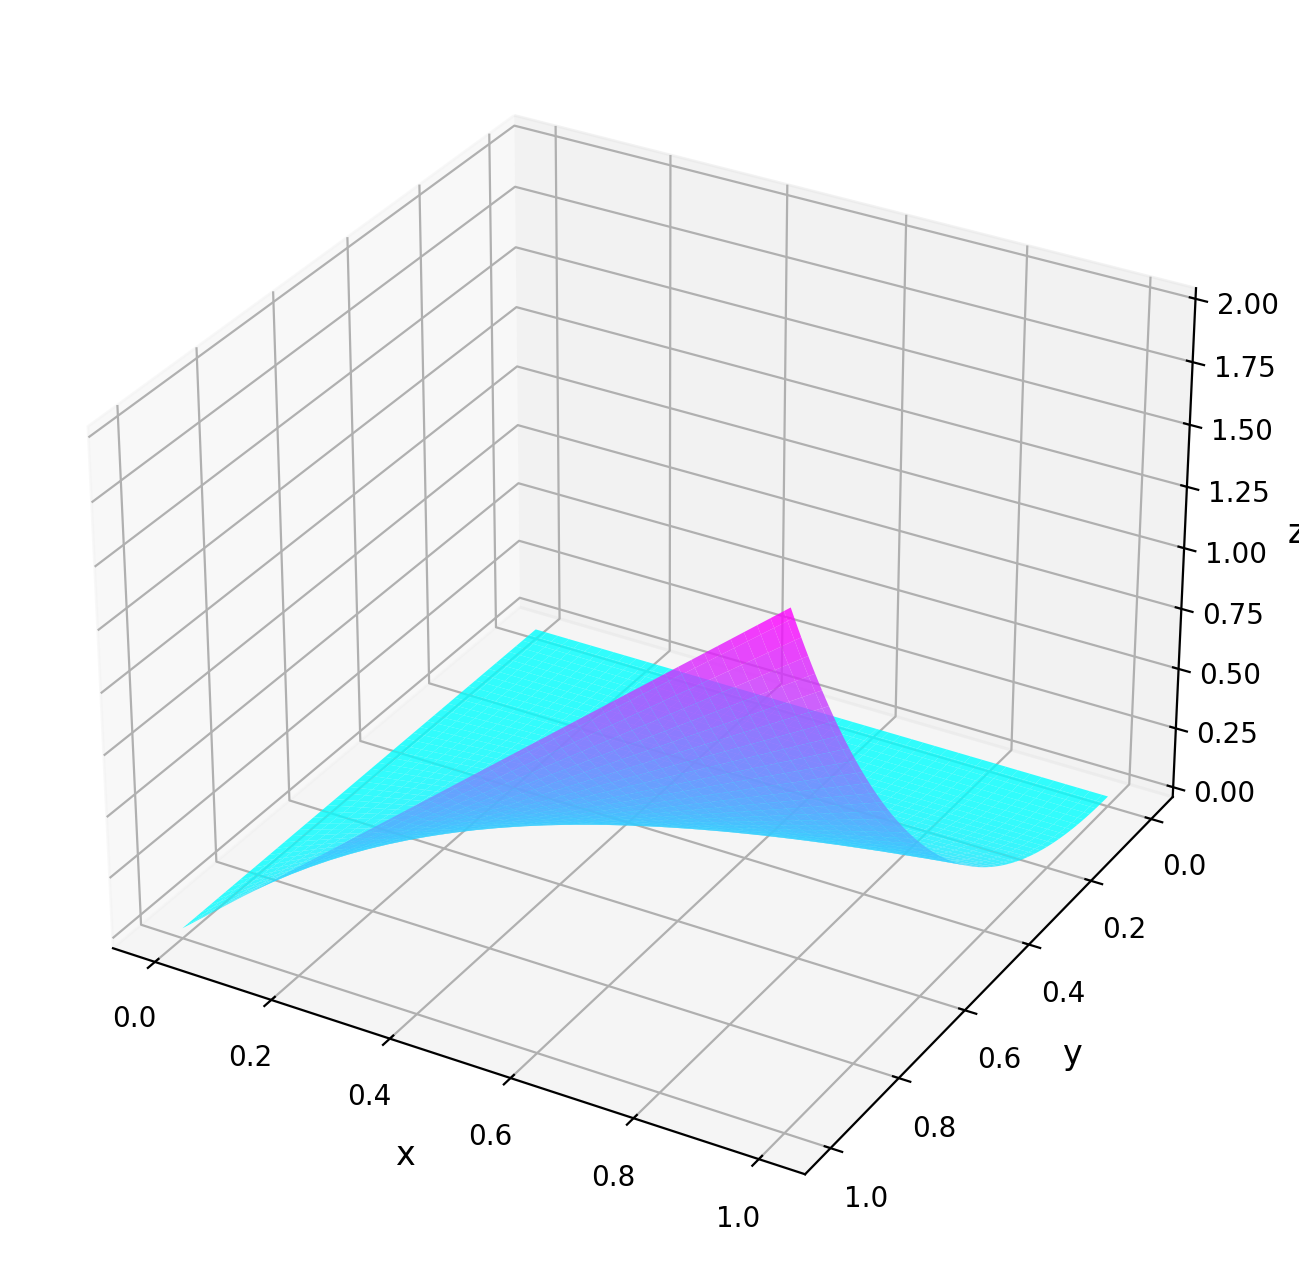

In [4]:
fig = plt.figure(dpi=200, figsize=(8, 8))
ax = plt.axes(projection='3d')
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = mu(X, Y)

ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.8)
ax.invert_yaxis()
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()


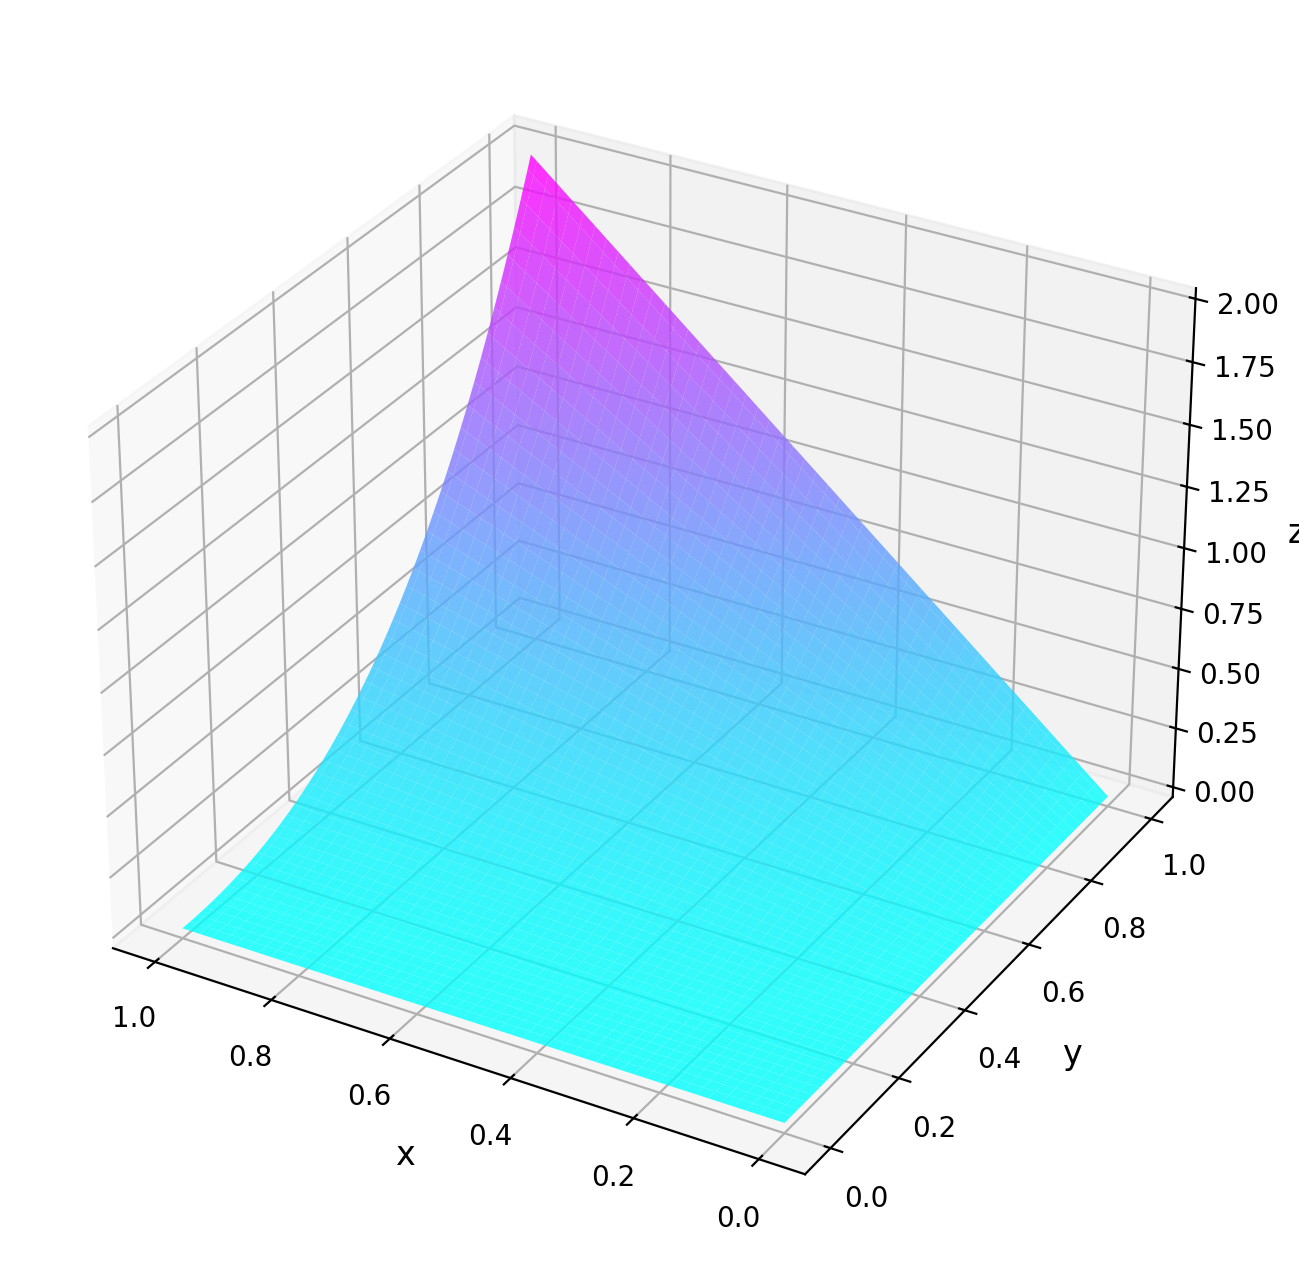

In [5]:
fig = plt.figure(dpi=200, figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.8)
ax.invert_xaxis()
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()

In [6]:
def show_table(df: pd.DataFrame, k_row: int = 1, k_col: int = 1) -> pd.DataFrame:
    return df.iloc[::k_row, ::k_col]


def get_char_table(solutions, exact, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0) -> pd.DataFrame:
    data = []
    headers = [
        "||F-AU_k||",
        "rel.d",
        "||U^k - U_*||",
        "rel.error",
        "||U^k - U^(k-1)||",
        "apost.est",
        "sp.red._k",
    ]

    for i, solution in enumerate(solutions):
        data.append(
            [
                matrix_norm(calculate_lhu(solution, x_vec, y_vec, x_step, y_step) + f_grid),
                matrix_norm(calculate_lhu(solution, x_vec, y_vec, x_step, y_step) + f_grid) / init_approx,
                matrix_norm(solution - exact),
                matrix_norm(solution - exact) / matrix_norm(u_0 - exact),
                matrix_norm(solution - solutions[i - 1]),
                (radius * matrix_norm(solution - solutions[i - 1])) / (1 - radius),
                matrix_norm(solution - solutions[i - 1]) / matrix_norm(solutions[i - 1] - solutions[i - 2]),
            ]
        )

    return pd.DataFrame(data=data, columns=headers)

In [7]:
eps = 1e-3

N = 20
x_vec = np.linspace(0, 1, N + 1)
x_step = x_vec[-1] / N

M = 20
y_vec = np.linspace(0, 1, M + 1)
y_step = y_vec[-1] / M

ksi = calc_ksi(c1, c2, d1, d2, x_step, y_step)

f_grid = get_f_grid(x_vec, y_vec)

exact_solution = get_exact_solution(x_vec, y_vec)
exact_solution_table = pd.DataFrame(data=exact_solution)

u_0 = fill_boundary_grid(x_vec, y_vec)

measure_of_approx = matrix_norm(calculate_lhu(exact_solution, x_vec, y_vec, x_step, y_step) + f_grid)

init_approx = matrix_norm(calculate_lhu(u_0, x_vec, y_vec, x_step, y_step) + f_grid)

n_iter_approx = num_iteration_approx(ksi, eps)

radius = spectral_radius_approx(ksi)

# 1.1 Метод простой итерации

In [8]:
from algorithms import simple_iteration

solution_list, n_fact_iters = simple_iteration.simple_iteration_method(x_vec, y_vec, x_step, y_step, n_iter_approx, eps)
approx_solution_table = pd.DataFrame(data=solution_list[-1])

char_table = get_char_table(solution_list, exact_solution, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0)

print("Оценка количества итераций:", n_iter_approx)
print("Фактическое количество итераций:", n_fact_iters)

show_table(char_table, k_row=25)

Оценка количества итераций: 1268
Фактическое количество итераций: 443


,||F-AU_k||,rel.d,||U^k - U_*||,rel.error,||U^k - U^(k-1)||,apost.est,sp.red._k
0,1798.930687,1.000000,1.671881,1.000000,1.671844,306.147685,79716.052708
25,29.651089,0.016483,0.469712,0.280948,0.016136,2.954835,0.937930
50,10.857435,0.006035,0.270529,0.161811,0.006018,1.102085,0.972054
75,9.000000,0.005003,0.176365,0.105489,0.003095,0.566796,0.980507
100,9.000000,0.005003,0.121754,0.072825,0.001842,0.337374,0.983610
125,9.000000,0.005003,0.086830,0.051936,0.001207,0.220965,0.990689
150,9.000000,0.005003,0.063021,0.037694,0.000829,0.151835,0.983517
175,9.000000,0.005003,0.045903,0.027456,0.000589,0.107931,0.984856
200,9.000000,0.005003,0.033576,0.020083,0.000428,0.078435,0.996909
225,9.000000,0.005003,0.024644,0.014740,0.000311,0.056862,0.983438


In [9]:
show_table(approx_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.018654,0.092509,0.245215,0.5
10,0.0,0.037886,0.185835,0.491009,1.0
15,0.0,0.057801,0.280127,0.737487,1.5
20,0.0,0.078125,0.375000,0.984375,2.0


In [10]:
show_table(exact_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.00000,0.000000,0.0
5,0.0,0.019531,0.09375,0.246094,0.5
10,0.0,0.039062,0.18750,0.492188,1.0
15,0.0,0.058594,0.28125,0.738281,1.5
20,0.0,0.078125,0.37500,0.984375,2.0


# 1.2 Метод итерации с оптимальным параметром

In [11]:
from algorithms import iteration_optimal

tau = iteration_optimal.get_tau(c1, c2, d1, d2, x_step, y_step)
solution_list, n_fact_iters = iteration_optimal.iteration_optimal(x_vec, y_vec, x_step, y_step, n_iter_approx, tau, eps)
approx_solution_table = pd.DataFrame(data=solution_list[-1])

char_table = get_char_table(solution_list, exact_solution, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0)

print("Оценка количества итераций:", n_iter_approx)
print("Фактическое количество итераций:", n_fact_iters)

show_table(char_table, k_row=25)


Оценка количества итераций: 1268
Фактическое количество итераций: 491


,||F-AU_k||,rel.d,||U^k - U_*||,rel.error,||U^k - U^(k-1)||,apost.est,sp.red._k
0,1798.930687,1.000000,1.671881,1.000000,1.671846,306.148042,90157.347248
25,30.658141,0.017042,0.487044,0.291315,0.016043,2.937716,0.951637
50,11.710068,0.006509,0.288964,0.172838,0.006045,1.107030,0.970074
75,9.000000,0.005003,0.192979,0.115426,0.003157,0.578055,0.979287
100,9.000000,0.005003,0.136233,0.081485,0.001916,0.350892,0.981190
125,9.000000,0.005003,0.099658,0.059608,0.001275,0.233458,0.984715
150,9.000000,0.005003,0.074154,0.044354,0.000888,0.162645,0.987060
175,9.000000,0.005003,0.055623,0.033270,0.000646,0.118212,0.987546
200,9.000000,0.005003,0.041891,0.025056,0.000477,0.087358,0.988412
225,9.000000,0.005003,0.031709,0.018966,0.000357,0.065423,0.988576


In [12]:
show_table(approx_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.018628,0.092472,0.245189,0.5
10,0.0,0.037893,0.185845,0.491016,1.0
15,0.0,0.057831,0.280171,0.737517,1.5
20,0.0,0.078125,0.375000,0.984375,2.0


In [13]:
show_table(exact_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.00000,0.000000,0.0
5,0.0,0.019531,0.09375,0.246094,0.5
10,0.0,0.039062,0.18750,0.492188,1.0
15,0.0,0.058594,0.28125,0.738281,1.5
20,0.0,0.078125,0.37500,0.984375,2.0


# 1.3 Метод Зейделя

In [14]:
from algorithms import zeydel

solution_list, n_fact_iters = zeydel.zeydel_method(x_vec, y_vec, x_step, y_step, n_iter_approx, eps)
approx_solution_table = pd.DataFrame(data=solution_list[-1])

char_table = get_char_table(solution_list, exact_solution, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0)

print("Оценка количества итераций:", n_iter_approx)
print("Фактическое количество итераций:", n_fact_iters)

show_table(char_table, k_row=25)

Оценка количества итераций: 1268
Фактическое количество итераций: 230


,||F-AU_k||,rel.d,||U^k - U_*||,rel.error,||U^k - U^(k-1)||,apost.est,sp.red._k
0,1798.930687,1.000000,1.671881,1.000000,1.671852,306.149131,40240.122475
25,13.387943,0.007442,0.319613,0.191170,0.014573,2.668654,0.934860
50,9.000000,0.005003,0.146292,0.087501,0.004412,0.807853,0.964996
75,9.000000,0.005003,0.076106,0.045521,0.001992,0.364780,0.972006
100,9.000000,0.005003,0.041152,0.024614,0.001029,0.188413,0.975027
125,9.000000,0.005003,0.022228,0.013295,0.000555,0.101679,0.975712
150,9.000000,0.005003,0.011990,0.007172,0.000300,0.054915,0.975627
175,9.000000,0.005003,0.006464,0.003867,0.000162,0.029621,0.975598
200,9.000000,0.005003,0.003485,0.002084,0.000087,0.015970,0.975589
225,9.000000,0.005003,0.001878,0.001124,0.000047,0.008609,0.975585


In [15]:
show_table(approx_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.018552,0.092447,0.245227,0.5
10,0.0,0.037827,0.185857,0.491094,1.0
15,0.0,0.057811,0.280209,0.737589,1.5
20,0.0,0.078125,0.375000,0.984375,2.0


In [16]:
show_table(exact_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.00000,0.000000,0.0
5,0.0,0.019531,0.09375,0.246094,0.5
10,0.0,0.039062,0.18750,0.492188,1.0
15,0.0,0.058594,0.28125,0.738281,1.5
20,0.0,0.078125,0.37500,0.984375,2.0


# 1.4 Метод верхней релаксации

In [17]:
from algorithms import relaxation

omega = relaxation.get_omega_opt(radius)
solution_list, n_fact_iters = relaxation.upper_relaxation_method(x_vec, y_vec, x_step, y_step, n_iter_approx, omega, eps)
approx_solution_table = pd.DataFrame(data=solution_list[-1])

char_table = get_char_table(solution_list, exact_solution, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0)

print("Оценка количества итераций:", n_iter_approx)
print("Фактическое количество итераций:", n_fact_iters)

show_table(char_table, k_row=5)

Оценка количества итераций: 1268
Фактическое количество итераций: 41


,||F-AU_k||,rel.d,||U^k - U_*||,rel.error,||U^k - U^(k-1)||,apost.est,sp.red._k
0,1798.930687,1.000000,1.671881,1.000000,1.671943,306.165951,389.886995
5,883.346033,0.491040,0.725098,0.433702,0.786396,144.004708,0.900734
10,472.820303,0.262834,0.295181,0.176556,0.428500,78.466804,0.897424
15,263.891919,0.146694,0.152257,0.091069,0.239698,43.893465,0.889552
20,148.547168,0.082575,0.097383,0.058247,0.134681,24.662696,0.880068
25,84.564055,0.047008,0.070103,0.041931,0.080612,14.761649,0.905343
30,48.573484,0.027001,0.041587,0.024875,0.052757,9.660858,0.928089
35,38.578431,0.021445,0.023496,0.014054,0.034923,6.395077,0.900705
40,9.000000,0.005003,0.003813,0.002281,0.017597,3.222331,0.544543


In [18]:
show_table(approx_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.019190,0.092917,0.245896,0.5
10,0.0,0.038755,0.187033,0.492244,1.0
15,0.0,0.058829,0.281354,0.738418,1.5
20,0.0,0.078125,0.375000,0.984375,2.0


In [19]:
show_table(exact_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.00000,0.000000,0.0
5,0.0,0.019531,0.09375,0.246094,0.5
10,0.0,0.039062,0.18750,0.492188,1.0
15,0.0,0.058594,0.28125,0.738281,1.5
20,0.0,0.078125,0.37500,0.984375,2.0


# 1.5 Итерационный метод с чебышевским набором параметров

In [20]:
from algorithms import chebyshev

sig = chebyshev.calc_sigma(c1, c2, d1, d2, x_step, y_step)
delt = chebyshev.calc_delta(c1, c2, d1, d2, x_step, y_step)
tau = chebyshev.calc_tau(sig, delt, n_iter_approx)

solution_list, n_fact_iters = chebyshev.chebyshev_method(x_vec, y_vec, x_step, y_step, n_iter_approx, tau, eps)
approx_solution_table = pd.DataFrame(data=solution_list[-1])

char_table = get_char_table(solution_list, exact_solution, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0)

print("Оценка количества итераций:", n_iter_approx)
print("Фактическое количество итераций:", n_fact_iters)

show_table(char_table, k_row=15)

Оценка количества итераций: 1268
Фактическое количество итераций: 144


,||F-AU_k||,rel.d,||U^k - U_*||,rel.error,||U^k - U^(k-1)||,apost.est,sp.red._k
0,1798.930687,1.000000,1.671881,1.000000,1.670809,305.958129,699.929319
15,859.525722,0.477798,1.309567,0.783290,0.412139,75.470854,0.114261
30,551.347171,0.306486,0.660944,0.395330,1.441631,263.991156,8.228239
45,221.164431,0.122942,0.447000,0.267364,0.078150,14.310728,0.167330
60,133.320051,0.074111,0.244634,0.146323,0.219693,40.230118,0.617921
75,170.765611,0.094926,0.222673,0.133187,0.170892,31.293679,0.414136
90,199.137341,0.110698,0.182493,0.109154,0.201997,36.989642,55.168769
105,9.000000,0.005003,0.009690,0.005796,0.001813,0.331927,0.147353
120,9.000000,0.005003,0.005760,0.003445,0.006114,1.119531,2.421579
135,9.000000,0.005003,0.003580,0.002141,0.001257,0.230230,0.130793


In [21]:
show_table(approx_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.019870,0.093547,0.246028,0.5
10,0.0,0.038713,0.187388,0.493179,1.0
15,0.0,0.058660,0.281460,0.738174,1.5
20,0.0,0.078125,0.375000,0.984375,2.0


In [22]:
show_table(exact_solution_table, k_row=5, k_col=5)

,0,5,10,15,20
0,0.0,0.000000,0.00000,0.000000,0.0
5,0.0,0.019531,0.09375,0.246094,0.5
10,0.0,0.039062,0.18750,0.492188,1.0
15,0.0,0.058594,0.28125,0.738281,1.5
20,0.0,0.078125,0.37500,0.984375,2.0


# 1.6 Попеременно треугольный итерационный метод

In [25]:
from algorithms import triangular

sigma = c1 * (4 / (x_step**2)) * ((np.sin((np.pi * x_step) / 2)) ** 2) + d1 * (4 / (y_step**2)) * ((np.sin((np.pi * y_step) / (2 * np.pi))) ** 2)
delta = c2 * (4 / (x_step**2)) * ((np.cos((np.pi * x_step) / 2)) ** 2) + d2 * (4 / (y_step**2)) * ((np.cos((np.pi * y_step) / (2 * np.pi))) ** 2)
eta = sigma / delta
omega = 2 / np.sqrt(sigma * delta)
gamma_1 = sigma / (2 + 2 * np.sqrt(eta))
gamma_2 = sigma / (4 * np.sqrt(eta))
tau = 2 / (gamma_1 + gamma_2)
ksi = gamma_1 / gamma_2

solution_list, n_fact_iters = triangular.triangle_method(x_vec, y_vec, x_step, y_step, omega, tau, eps)
approx_solution_table = pd.DataFrame(data=solution_list[-1])

char_table = get_char_table(solution_list, exact_solution, x_vec, y_vec, x_step, y_step, f_grid, init_approx, radius, u_0)

print("Оценка количества итераций:", num_iteration_approx(spectral_radius_approx(ksi), eps))
print("Фактическое количество итераций:", n_fact_iters)

show_table(char_table, k_row=1)

Оценка количества итераций: 4
Фактическое количество итераций: 14


,||F-AU_k||,rel.d,||U^k - U_*||,rel.error,||U^k - U^(k-1)||,apost.est,sp.red._k
0,1798.930687,1.000000,1.671881,1.000000,1.671880,306.154331,487.663494
1,769.401009,0.427699,0.714812,0.427549,0.962635,176.277478,0.575780
2,328.747429,0.182746,0.323549,0.193524,0.409591,75.004270,0.425490
3,140.873589,0.078310,0.146987,0.087917,0.176562,32.332013,0.431069
4,60.189687,0.033459,0.066895,0.040012,0.081253,14.878953,0.460193
5,25.665408,0.014267,0.031002,0.018543,0.036351,6.656543,0.447380
6,10.833343,0.006022,0.015877,0.009496,0.022186,4.062775,0.610343
7,9.000000,0.005003,0.009762,0.005839,0.017705,3.242184,0.798022
8,9.000000,0.005003,0.006288,0.003761,0.013752,2.518251,0.776714
9,9.000000,0.005003,0.004664,0.002790,0.010952,2.005581,0.796418


# 1.7 